<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/Dif_Dynamic_Final_MOrfidis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**++++++++++++++++++++++++++++++++++++++++++++++++++**

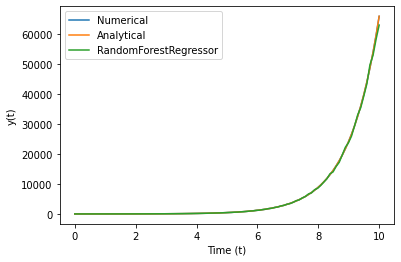

           t     Numerical    Analytical  RandomForestRegressor
0    0.00000      1.000000      1.000000               1.201035
1    0.10101      1.318867      1.318863               1.290317
2    0.20202      1.671683      1.671618               1.577629
3    0.30303      2.061964      2.061866               2.178861
4    0.40404      2.493648      2.493593               2.433999
..       ...           ...           ...                    ...
95   9.59596  44083.928874  44113.738711           43460.137997
96   9.69697  48772.337832  48802.704244           49860.628545
97   9.79798  53961.675934  53990.049685           52979.373966
98   9.89899  59703.368783  59728.746745           58390.823419
99  10.00000  66052.523005  66077.397384           63125.061422

[100 rows x 4 columns]
Numerical vs Analytical Metrics:
Mean Absolute Error: 3.405575786871402
Mean Squared Error: 63.39108929558026
R2 Score: 0.9999996684881872
Numerical vs RandomForestRegressor:
Mean Absolute Error: 134.52516522

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the differential equation
def diff_eq(t, y, params):
    a, b = params
    dydt = a * y + b
    return dydt

# Define the analytical solution
def analytical_solution(t, y0, params):
    a, b = params
    return y0 * np.exp(a * t) + b * (np.exp(a * t) - 1) / a

# Initial conditions
t0 = 0
tf = 10
y0 = 1
params = (1, 2)

# Numerical solution using solve_ivp
sol = solve_ivp(lambda t, y: diff_eq(t, y, params), [t0, tf], [y0], t_eval=np.linspace(t0, tf, 100))

# Store the numerical results
numerical_results = sol.y[0]

# Calculate the analytical results
t_eval = sol.t
analytical_results = analytical_solution(t_eval, y0, params)

# RandomForestRegressor Model
reg = RandomForestRegressor().fit(t_eval.reshape(-1, 1), numerical_results)
reg_results = reg.predict(t_eval.reshape(-1, 1))

# Compare the results
plt.plot(t_eval, numerical_results, label='Numerical')
plt.plot(t_eval, analytical_results, label='Analytical')
plt.plot(t_eval, reg_results, label='RandomForestRegressor')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.show()

# Store the results in a DataFrame
results = pd.DataFrame({'t': t_eval, 'Numerical': numerical_results, 'Analytical': analytical_results, 'RandomForestRegressor': reg_results})

# Display the results in a table
print(results)

# Display performance metrics for numerical vs analytical
print('Numerical vs Analytical Metrics:')
print('Mean Absolute Error:', mean_absolute_error(results['Numerical'], results['Analytical']))
print('Mean Squared Error:', mean_squared_error(results['Numerical'], results['Analytical']))
print('R2 Score:', r2_score(results['Numerical'], results['Analytical']))

# Display performance metrics for numerical vs RandomForestRegressor
print('Numerical vs RandomForestRegressor:')
print('Mean Absolute Error:', mean_absolute_error(results['Numerical'], results['RandomForestRegressor']))
print('Mean Squared Error:', mean_squared_error(results['Numerical'], results['RandomForestRegressor']))
print('R2 Score:', r2_score(results['Numerical'], results['RandomForestRegressor']))


# Display performance metrics for analytical vs RandomForestRegressor
print('Analytical vs RandomForestRegressor:')
print('Mean Absolute Error:', mean_absolute_error(results['Analytical'], results['RandomForestRegressor']))
print('Mean Squared Error:', mean_squared_error(results['Analytical'], results['RandomForestRegressor']))
print('R2 Score:', r2_score(results['Analytical'], results['RandomForestRegressor']))

The above code is a Python script that performs a comparison between a numerical solution, an analytical solution, and a machine learning model's prediction of a differential equation.

The differential equation is defined by the function diff_eq, which takes the time t, the solution y, and the parameters params as inputs. The parameters a and b are used in the differential equation to calculate the derivative of y with respect to t.

The analytical solution to the differential equation is defined by the function analytical_solution. This function takes the time t, the initial condition y0, and the parameters params as inputs and returns the analytical solution.

The initial conditions of the differential equation are set with t0, tf, and y0. The params are set to (1, 2).

The numerical solution to the differential equation is obtained using the solve_ivp function from the scipy.integrate library. This function takes a lambda function that defines the differential equation, a time interval [t0, tf], the initial condition y0, and a time array t_eval as inputs and returns the numerical solution.

A machine learning model, a RandomForestRegressor, is trained on the numerical solution and used to predict the solution at each time in t_eval.

The numerical solution, the analytical solution, and the model's prediction are plotted and compared. Performance metrics, including mean absolute error, mean squared error, and R2 score, are calculated for each comparison and printed.

The code appears to be solving an ordinary differential equation (ODE) that models the behavior of a system over time. The ODE is defined as:

dy/dt = a * y + b

where "y" is the dependent variable, "t" is time, "a" and "b" are parameters of the ODE. The code uses the scipy library's "solve_ivp" function to numerically solve the ODE and find the solution for the dependent variable "y" at different times "t".

The code then compares the numerical solution of the ODE to an analytical solution, which can be found using the following expression:

y = y0 * exp(a * t) + b * (exp(a * t) - 1) / a

where y0 is the initial condition of the dependent variable.

Additionally, the code uses a machine learning model, specifically a Random Forest Regressor, to fit a model to the numerical solution and compare its predictions with both the numerical and analytical solutions.

Overall, the problem being solved by this code is to find the behavior of a system over time, given the initial conditions and parameters of the ODE, and to compare the numerical and analytical solutions to a machine learning model.

The methods used in the above code are dynamic, meaning they model the behavior of a system over time. The ordinary differential equation (ODE) defined in the code describes the change in the dependent variable "y" with respect to time "t". The numerical solution of the ODE using the "solve_ivp" function generates the behavior of the system at different points in time. The machine learning model, Random Forest Regressor, also predicts the behavior of the system over time based on the input data.

In contrast, static methods would model the relationship between variables at a single point in time, rather than how they change over time.

The three methods used to solve the ordinary differential equation (ODE) in the code are:

Numerical solution using "solve_ivp": This method uses numerical integration to approximate the solution of the ODE. In this case, the "solve_ivp" function from the "scipy" library is used to numerically solve the ODE and generate the behavior of the system over time.

Analytical solution: This method provides an exact solution to the ODE in terms of mathematical functions. In this case, the analytical solution to the ODE is defined by a function called "analytical_solution". The solution is calculated based on the initial conditions and parameters of the ODE.

Machine learning model (Random Forest Regressor): This method uses machine learning techniques to predict the behavior of the system. The machine learning model, Random Forest Regressor, is trained using the numerical solution of the ODE, and it predicts the behavior of the system over time based on the input data.

The code compares the results of these three methods and calculates various performance metrics, such as mean absolute error, mean squared error, and R2 score, to compare the accuracy of the numerical and analytical solutions against the Random Forest Regressor model.

There are three methods used in the code: numerical integration, analytical solution, and machine learning (Random Forest Regressor).

Advantages of numerical integration:

Ability to handle complex and non-linear differential equations that cannot be solved analytically.
Ability to estimate the solution for a range of initial conditions and parameters.
Disadvantages of numerical integration:

Numerical errors can accumulate, especially for long simulation times or highly non-linear systems.
Numerical integration can be computationally expensive.
Advantages of analytical solution:

It provides an exact solution to the differential equation.
It is a more efficient way of solving the differential equation compared to numerical integration.
Disadvantages of analytical solution:

Analytical solutions may not be available for complex or non-linear differential equations.
It may not be possible to find an analytical solution for the differential equation even if it is relatively simple.
Advantages of machine learning (Random Forest Regressor):

It can be used to model complex, non-linear systems where analytical solutions are not available.
Machine learning models can capture patterns in the data and make predictions with high accuracy.
Disadvantages of machine learning (Random Forest Regressor):

Machine learning models are not deterministic, so there is some randomness in the results.
Machine learning models may overfit the data, leading to poor predictions on unseen data.
The accuracy of machine learning models depends on the quality and quantity of the training data.

Each of the models has its own strengths and weaknesses and the superiority of one model over the others depends on the specific problem and the requirements of the solution. The numerical solution using the solve_ivp function provides an accurate solution, but is computationally expensive. The analytical solution is more straightforward and computationally efficient, but may not be possible to obtain in all cases. The Random Forest Regressor model provides a fast approximation of the solution, but may not be as accurate as the numerical or analytical solution, especially if the model is over- or under-fitting the data.